In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("Students_Grading_Dataset.csv")

In [4]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [5]:
df.tail()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Engineering,83.92,83.24,53.47,...,69.25,77.86,F,29.2,No,Yes,PhD,Low,2,6.1


In [6]:
df.shape

(5000, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [9]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [8]:
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

## Tratamento de valores Nulos

### Preenchimento de Variáveis
Criação de uma nova categoria "Unknown" em Parent_Education_Level, para manter a integridade dos outros dados

In [12]:
df['Parent_Education_Level'].fillna('Unknown', inplace=True)

### Interpolação baseada nos outros scores
Como as notas de Midterm_Score, Final_Score e Quizzes_Avg estão disponíveis, pode-se prever os valor de Assignments_Avg usando a média ponderada dos outros escores.

In [13]:
df['Assignments_Avg'].fillna(df[['Midterm_Score', 'Final_Score', 'Quizzes_Avg']].mean(axis=1), inplace=True)

### Verificando a Normalidade da Distribuição para Attendance (%) (Media ou Mediana)
Para saber se a Media ou a Mediana é a melhor abordagem para tratamento dos dados NaN em Attendance (%), devemos testar se os dados seguem uma distribuição normal. 

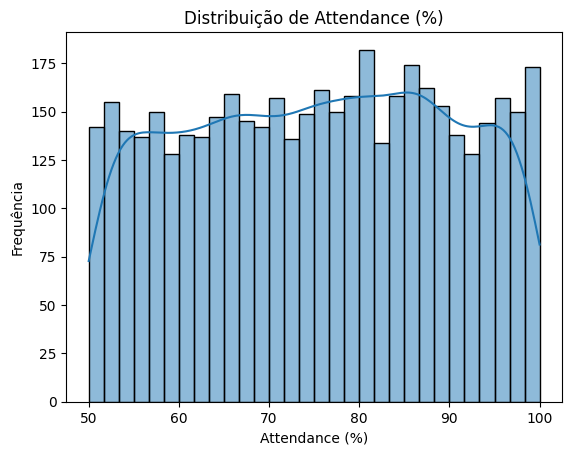

In [15]:
sns.histplot(df['Attendance (%)'].dropna(), kde=True, bins=30)  # kde=True adiciona a curva de densidade
plt.title("Distribuição de Attendance (%)")
plt.xlabel("Attendance (%)")
plt.ylabel("Frequência")
plt.show()

Como a curva não é simétrica, isso sugere que os dados não são normais.

### Uso de Mendiana para Attendance (%)
Os dados de Attendance (%) nao são normais, sugerindo o uso da mediana notratamento de valores NaN.

In [21]:
df['Attendance (%)'].fillna(df['Attendance (%)'].median(), inplace=True)

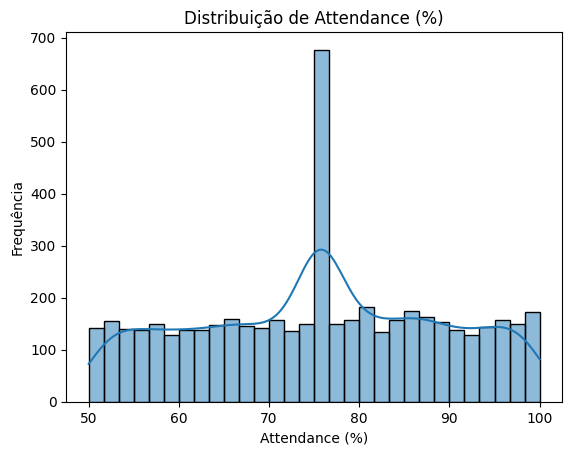

In [22]:
sns.histplot(df['Attendance (%)'].dropna(), kde=True, bins=30)  # kde=True adiciona a curva de densidade
plt.title("Distribuição de Attendance (%)")
plt.xlabel("Attendance (%)")
plt.ylabel("Frequência")
plt.show()